# Matt Kearney - CS 559 - HW8

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

DF = pd.read_csv('Hitters.csv')

 #### b. [15 pts] The data set is raw data set and it needs to be trained before applying base learners. There are a few missing targets and three discrete features, while the rest are continuous. Impute the missing target values with a mean value. Convert the text features to integers. Split the data set into train and test sets in the ratio of 8 to 2. Calculate the standard deviation of the test target. This will be used as a target error value.

In [85]:
m, n = DF.shape
print(f"({m}, {n})")
DF.describe()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [86]:
DF.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


#### Find missing values

In [87]:
DF.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [88]:
mean_salary = DF['Salary'].mean()
mean_salary

535.9258821292775

#### Impute mean salary into missing

In [89]:
for obs in range(0,m):
    if (pd.isna(DF['Salary'][obs])):
        DF.loc[obs, 'Salary'] = mean_salary

DF['Salary'].fillna(mean_salary, inplace=True)
DF['Salary'].head() # check that mean was imputed

0    535.925882
1    475.000000
2    480.000000
3    500.000000
4     91.500000
Name: Salary, dtype: float64

#### We should also change 'League', 'Division', and 'New League' to integers (ordinal data).

In [90]:
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())

for i in range(0,m):
    if (DF['League'][i]=='A'): # change 'A' to 0
        DF.loc[i, 'League'] = 0
    else: # change 'N' to 1
        DF.loc[i, 'League'] = 1

    if (DF['Division'][i]=='E'): #change 'E' to 0
        DF.loc[i, 'Division'] = 0
    else:  # change 'W' to 1
        DF.loc[i, 'Division'] = 1

    if (DF['NewLeague'][i]=='A'): # change 'A' to 0
        DF.loc[i, 'NewLeague'] = 0
    else: # change 'N' to 1
        DF.loc[i, 'NewLeague'] = 1
        
print("Different leagues: \t", DF['League'].unique())
print("Different divisions: \t", DF['Division'].unique())
print("Different new leagues: \t", DF['NewLeague'].unique())


Different leagues: 	 ['A' 'N']
Different divisions: 	 ['E' 'W']
Different new leagues: 	 ['A' 'N']
Different leagues: 	 [0 1]
Different divisions: 	 [0 1]
Different new leagues: 	 [0 1]


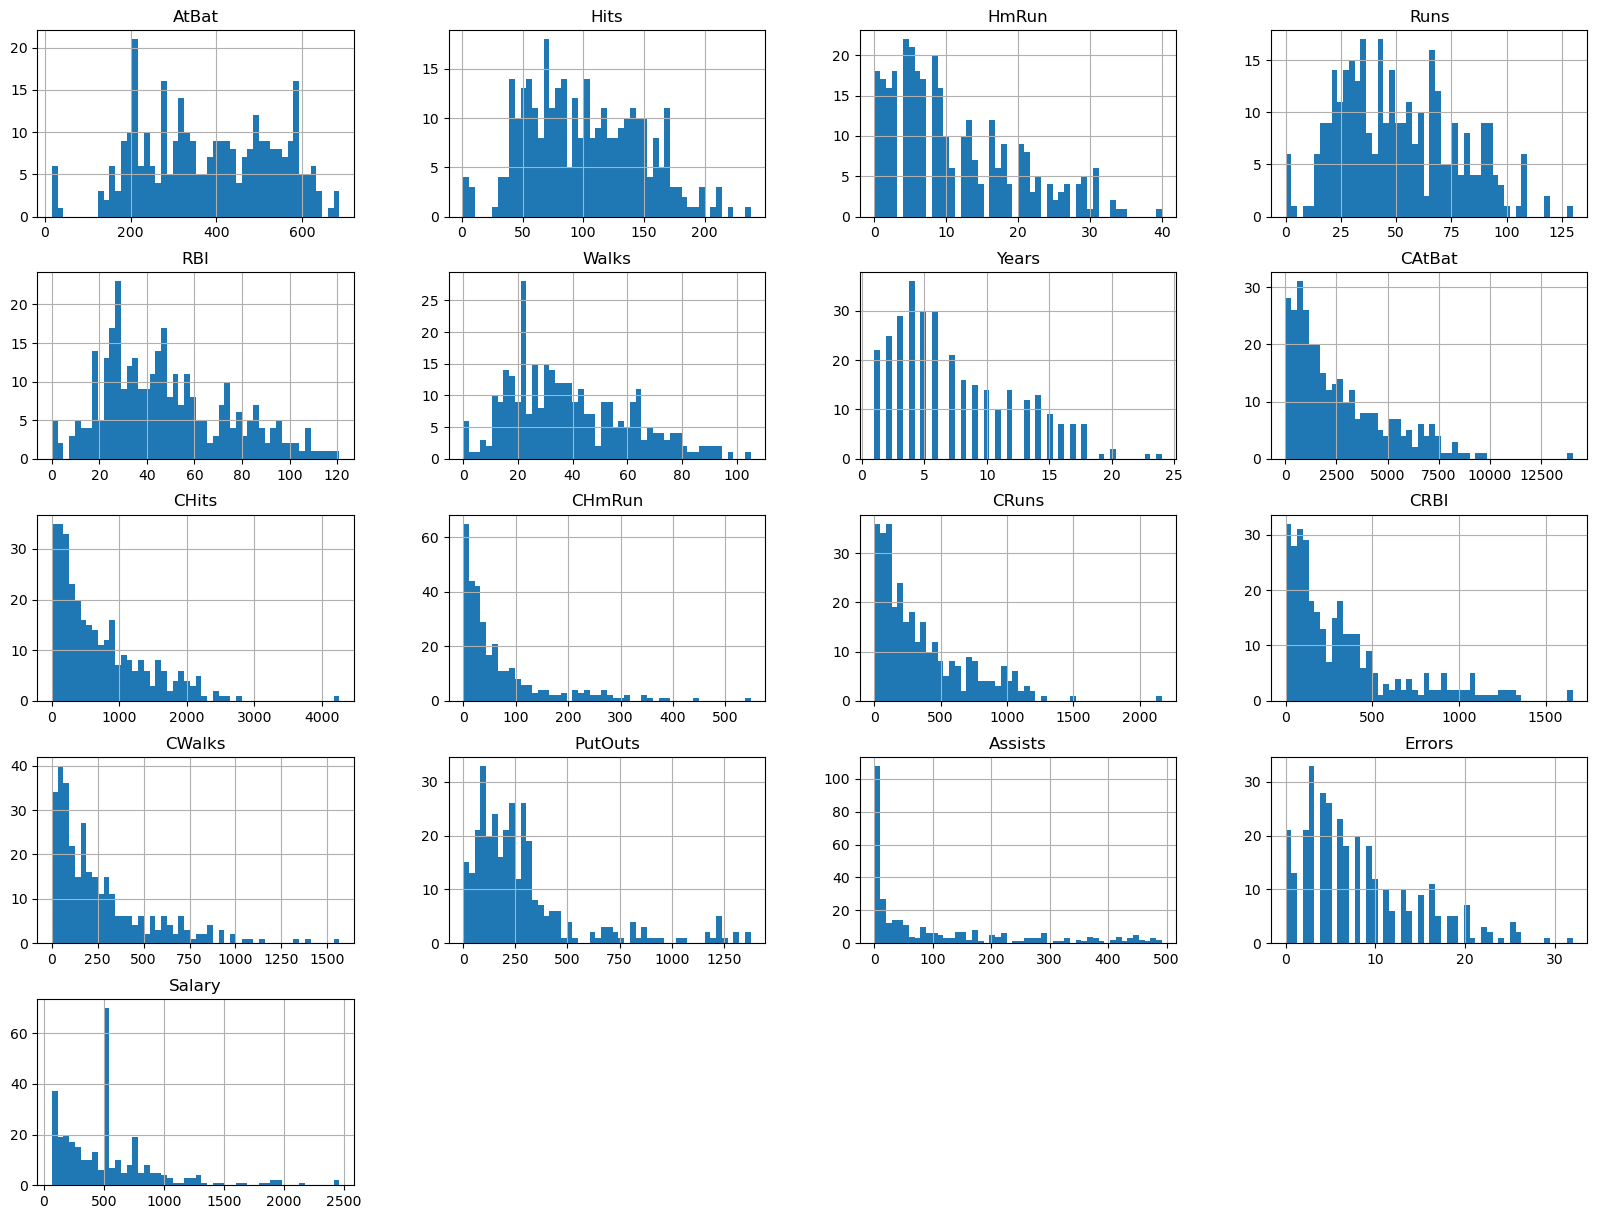

In [91]:
DF.hist(bins=50, figsize=(20,15))
plt.show()

Is imputing with the mean the best thing to do? 

#### Splitting the data 4:1 training:test

In [92]:
train, test = train_test_split(DF, test_size=0.2)
len_DF = len(DF)
print("supsected: \n\tsize of train: ",  0.8*len_DF, "\n\tsize of test: ", 0.2*len_DF)

print("sklearn: \n\tsize of train: ",  len(train), "\n\tsize of test: ", len(test))

supsected: 
	size of train:  257.6 
	size of test:  64.4
sklearn: 
	size of train:  257 
	size of test:  65


#### We can note that sklearn gave the extra observation to the test set

In [93]:
mean = test['Salary'].mean()
acc = 0
for i in range(0, len(test)):
    acc = acc + (test.iloc[i]['Salary'] - mean)**2

stdev_formula = np.sqrt(acc / len(test))
target_error = test['Salary'].std()

print(f"standard deviation by formula: \n\t{stdev_formula}\npandas standard deviation calculation: {target_error}\n\n")


standard deviation by formula: 
	418.94460147926475
pandas standard deviation calculation: 422.2049199230063




#### The formula and the pandas standard deviation calcualtions are roughly the same, where mine is consisently 3-4 [units of Salary] below pandas. 

#### c. [15 pts] Write a method that returns the new features from the base learners. Base learners can be any algorithms discussed in the lecture. There are no limits on base learner trials, but only three base learners will be collected and used in the meta-learning process. Explain why you choose them as base learners.

We may want to visualize our data so we can get an idea for the best-qualified base learners. Before taking a deeper dive into the data, I am interested in implementing a non-linear Kernel SVM, decision trees or random forest, kNN and neural networks with non-parametric activation functions are all possible. 

In [94]:
corr_matrix = DF[DF.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,-0.101663,-0.045441,0.317550,0.353824,0.352117,0.342474,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,-0.101038,-0.071143,0.310673,0.320455,0.310038,0.384974,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,-0.177258,-0.017206,0.282923,-0.106329,0.039318,0.311615,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,-0.150392,-0.076311,0.279347,0.220567,0.240475,0.372257,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,-0.145597,-0.075531,0.343186,0.106591,0.193370,0.401647,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,-0.045337,-0.059086,0.299515,0.149656,0.129382,0.402465,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.047261,0.021126,-0.004684,-0.080638,-0.162140,0.352235,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,-0.028738,0.022965,0.062283,0.002038,-0.066922,0.467636,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,-0.025790,0.013584,0.076547,-0.002523,-0.062756,0.491152,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,-0.098383,0.006783,0.112724,-0.158511,-0.138115,0.451876,-0.097461


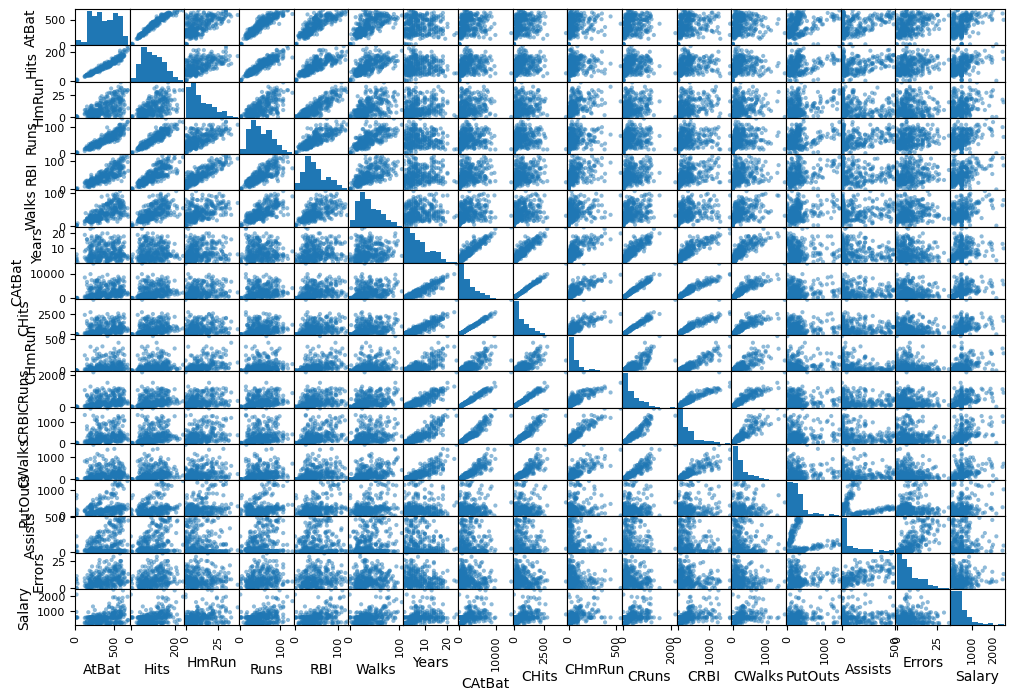

In [95]:
from pandas.plotting import scatter_matrix

scatter_matrix(DF[DF.columns.tolist()], figsize=(12,8))
plt.show()

While the above scatter plot may be hard to draw conclusions from, we are able to enlarge some of the specific plots that show great correlations. Over our entire dataset, we can see generally high correlations, but not all of them are very correlated and while some of them are highly correlated. This is evident as if we are able to look at the scatter plot and the scatter matrix together, we can visually and analytically see the relation of high correlation values in deep orange and red pockets as well as the plotted linear relationships. We will want to ensure that our base models are capable of observing these sparse but real patterns. <br><br>
Those with intensive baseball domains may desire and value a more symbolic relationship of these variables at play and how many insights can be driven to improve the model. I will use my limited baseball understanding to understand as much about the data as possible, at which point I will give my faith to divserse non-parametric models such that we can make (hopefully) more accurate predictions than possible from a single model. Let's take a look at examples of a pair of loosely correlated features and then a pair of highly correlated features so we can get a general premise of the data. While it may not be a valuable use of our time to research baseball statistics, we should try to understand the degree of correlation and the general underlying patterns identifiable in the data.

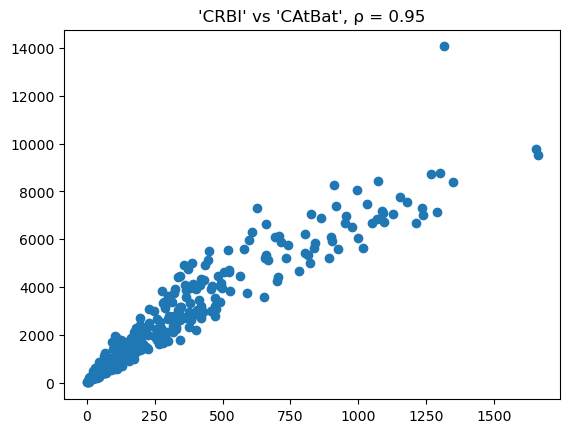

In [96]:
plt.scatter(DF['CRBI'], DF['CAtBat'])
plt.title(f"'CRBI' vs 'CAtBat', ρ = {round(corr_matrix['CAtBat']['CRBI'], 2)}")
plt.show()

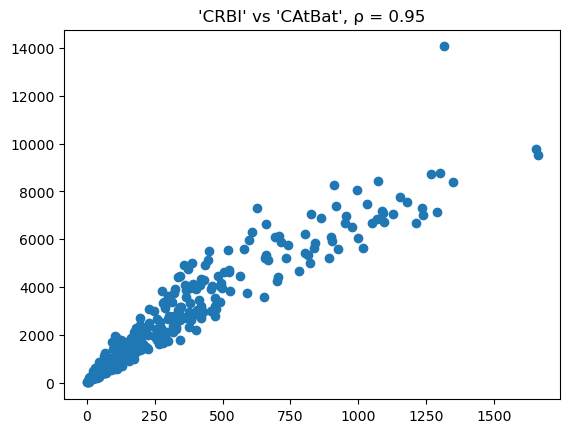

In [97]:
plt.scatter(DF['CRBI'], DF['CAtBat'])
plt.title(f"'CRBI' vs 'CAtBat', ρ = {round(corr_matrix['CAtBat']['CRBI'], 2)}")
plt.show()

Above is a view of a highly correlated pair of features. Below are two quite loosely correlated pairs of variables.

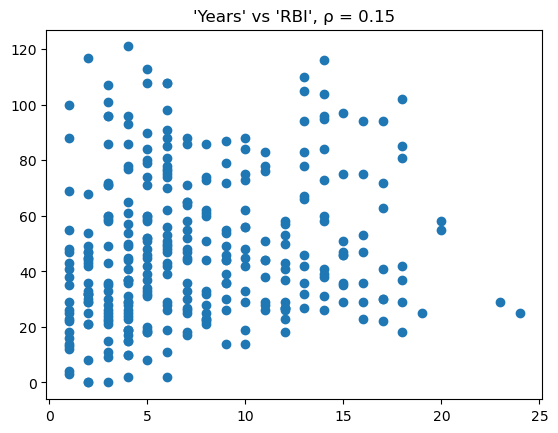

In [98]:
plt.scatter(DF['Years'], DF['RBI'])
plt.title(f"'Years' vs 'RBI', ρ = {round(corr_matrix['Years']['RBI'], 2)}")
plt.show()

In [99]:
# X = np.array(DF[DF.columns.tolist().remove('Salary')])
# y = np.array(DF['Salary'])

# X
# # plt.scatter(X,y)